# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/defungi/H3/H3_5a_17.jpg
/kaggle/input/defungi/H3/H3_5b_9.jpg
/kaggle/input/defungi/H3/H3_11a_42.jpg
/kaggle/input/defungi/H3/H3_3c_16.jpg
/kaggle/input/defungi/H3/H3_36a_1.jpg
/kaggle/input/defungi/H3/H3_29a_3.jpg
/kaggle/input/defungi/H3/H3_9a_9.jpg
/kaggle/input/defungi/H3/H3_28a_3.jpg
/kaggle/input/defungi/H3/H3_35a_7.jpg
/kaggle/input/defungi/H3/H3_12b_1.jpg
/kaggle/input/defungi/H3/H3_1a_23.jpg
/kaggle/input/defungi/H3/H3_13a_39.jpg
/kaggle/input/defungi/H3/H3_10a_6.jpg
/kaggle/input/defungi/H3/H3_9b_5.jpg
/kaggle/input/defungi/H3/H3_4b_15.jpg
/kaggle/input/defungi/H3/H3_5a_35.jpg
/kaggle/input/defungi/H3/H3_35a_6.jpg
/kaggle/input/defungi/H3/H3_6b_17.jpg
/kaggle/input/defungi/H3/H3_5a_28.jpg
/kaggle/input/defungi/H3/H3_11a_49.jpg
/kaggle/input/defungi/H3/H3_5c_2.jpg
/kaggle/input/defungi/H3/H3_11b_13.jpg
/kaggle/input/defungi/H3/H3_6a_63.jpg
/kaggle/input/defungi/H3/H3_24a_2.jpg
/kaggle/input/defungi/H3/H3_6a_52.jpg
/kaggle/input/defungi/H3/H3_6a_12.jpg
/kaggle/inpu

In [3]:
#Create Files_Name
image_data='/kaggle/input/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [4]:
#Create Files_Name
#image_data='defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/defungi/H5/H5_37a_3.jpg,H5
1,/kaggle/input/defungi/H6/H6_71a_8.jpg,H6
2,/kaggle/input/defungi/H1/H1_57c_8.jpg,H1
3,/kaggle/input/defungi/H1/H1_1d_17.jpg,H1
4,/kaggle/input/defungi/H2/H2_79d_3.jpg,H2
...,...,...
9109,/kaggle/input/defungi/H1/H1_115b_6.jpg,H1
9110,/kaggle/input/defungi/H1/H1_48c_6.jpg,H1
9111,/kaggle/input/defungi/H2/H2_48c_14.jpg,H2
9112,/kaggle/input/defungi/H1/H1_114a_13.jpg,H1


# Visualization

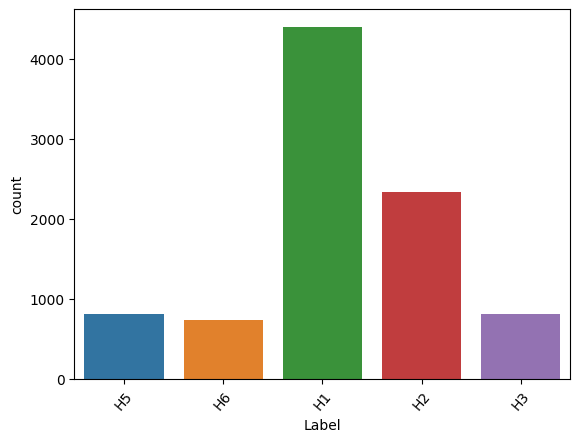

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

# Split Train and Test Dataset

In [14]:
train_data_dir =image_data
batch_size = 16
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['H1','H2','H3','H5','H6'],
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['H1','H2','H3','H5','H6'],
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [15]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

## Model

In [30]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

In [17]:
base_model = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


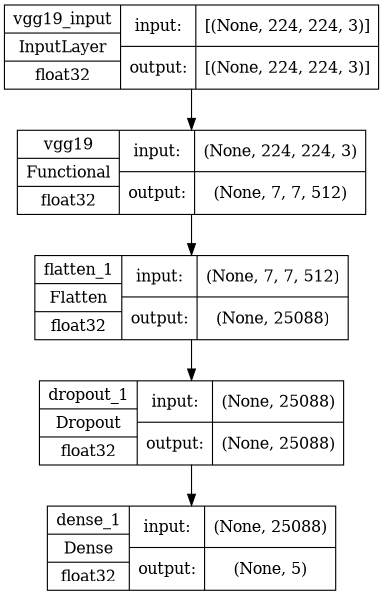

In [25]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [18]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [19]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [21]:
keras_model.compile(optimizer ='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
456/456 [==============================] - 60s 127ms/step - loss: 5.4634 - accuracy: 0.5771 - val_loss: 4.3861 - val_accuracy: 0.6943
Epoch 2/20
456/456 [==============================] - 52s 114ms/step - loss: 3.8942 - accuracy: 0.6954 - val_loss: 4.6714 - val_accuracy: 0.6443
Epoch 3/20
456/456 [==============================] - 53s 116ms/step - loss: 3.4612 - accuracy: 0.7444 - val_loss: 4.5233 - val_accuracy: 0.6970
Epoch 4/20
456/456 [==============================] - 52s 115ms/step - loss: 3.2827 - accuracy: 0.7622 - val_loss: 5.2658 - val_accuracy: 0.7124
Epoch 5/20
456/456 [==============================] - 53s 115ms/step - loss: 2.9736 - accuracy: 0.7857 - val_loss: 5.9862 - val_accuracy: 0.7058
Epoch 6/20
456/456 [==============================] - 53s 116ms/step - loss: 2.8863 - accuracy: 0.7990 - val_loss: 5.8647 - val_accuracy: 0.7102


**###Extracting features of below fungi image from layers of above VGG19 model**

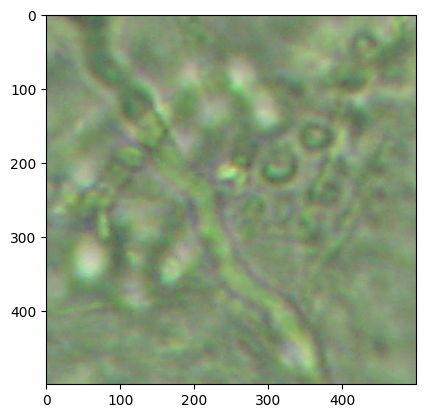

In [53]:
# Showing original fungus image for reference. We will extract features for this image from different 
#layers of VGG19 model


from PIL import Image
import matplotlib.pyplot as plt

img_path = '/kaggle/input/defungi/H2/H2_51b_3.jpg'

# Read the image
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.show()


**##Extracting features of above fungi image from flatten_1 layer of above VGG19 model**

In [34]:
model1 = Model(inputs=keras_model.input, outputs=keras_model.get_layer('flatten_1').output)

img_path = '/kaggle/input/defungi/H2/H2_51b_3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

flatten_features = model.predict(x)

1/1 [==============================] - 0s 21ms/step


In [35]:
flatten_features

array([[8.028913, 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

**##Extracting features of above fungi image from dropout_1 layer of above VGG19 model**

In [47]:
model1 = Model(inputs=keras_model.input, outputs=keras_model.get_layer('dropout_1').output)

img_path = '/kaggle/input/defungi/H2/H2_51b_3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

dropout_1_features = model.predict(x)

1/1 [==============================] - 0s 21ms/step


In [48]:
dropout_1_features

array([[8.028913, 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

**##Extracting features of above fungi image from dense_1 layer of above VGG19 model**

In [49]:
model1 = Model(inputs=keras_model.input, outputs=keras_model.get_layer('dense_1').output)

img_path = '/kaggle/input/defungi/H2/H2_51b_3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

dense_1_features = model.predict(x)

1/1 [==============================] - 0s 20ms/step


In [50]:
dense_1_features

array([[8.028913, 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)